In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [134]:
class Isoelastic:
    def __init__(self, elasticity=1.0, scale=1.0, minimum_price=0.0):
        self.elasticity = elasticity
        self.scale = scale
        self.p0 = minimum_price

    def ad_valorem(self, t):
        e = self.elasticity
        Q = self.scale
        p = self.p0
        return Isoelastic(e, Q * np.pow(1 - t, e), p / (1 - t))

    def __call__(self, p):
        x = np.maximum(p - self.p0, 0)
        x[x == 0] = np.nan
        q = self.scale * np.pow(x, self.elasticity)
        q[np.isnan(x)] = 0
        return q

In [135]:
class Plot:
    def __init__(self, ax):
        self.ax = ax
        self.ax.set_xlim(0, 0.999)
        self.ax.set_ylim(0, 0.999)
        self.ax.set_xticklabels([])
        self.ax.set_yticklabels([])
        self.ax.tick_params(axis='both', which='both', length=0)
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        #self.ax.set_xlabel('quantity')
        #self.ax.set_ylabel('price')
        self.p = np.linspace(0, 1, 1000)
        self.s = None
        self.d = None

    def supply(self, s):
        s[s == 0] = np.nan
        self.ax.plot(s, self.p, label="Supply")
        self.s = s

    def demand(self, d):
        d[d == 0] = np.nan
        self.ax.plot(d, self.p, label="Demand")
        self.d = d

    def cross(self):
        assert self.s is not None
        assert self.d is not None
        i = np.nanargmin(np.abs(self.s - self.d))
        p = self.p[i]
        q = self.s[i]
        self.ax.plot([q, q], [0, p], linewidth=1, linestyle='--', color='k', alpha=0.5)
        self.ax.plot([0, q], [p, p], linewidth=1, linestyle='--', color='k', alpha=0.5)
        self.ax.scatter([q], [p], 15, color='red', zorder=10)

    def title(self, s):
        self.ax.set_title(s, fontsize=10, pad=10)

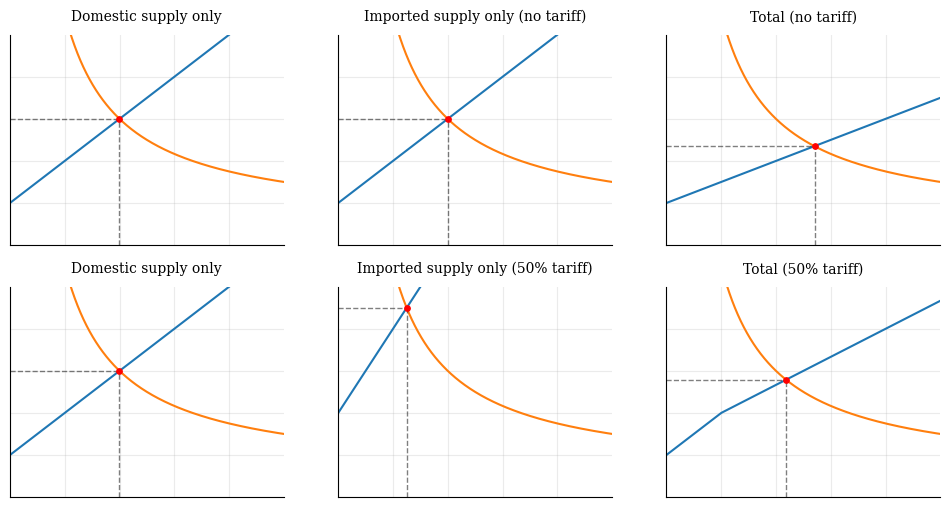

In [157]:
Sd = Isoelastic(1, 1, 0.20)
Sf = Isoelastic(1, 1, 0.20)
Sf2 = Sf.ad_valorem(0.50)
D = Isoelastic(-1, 0.2, 0.1)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

plot = Plot(ax[0][0])
plot.supply(Sd(plot.p))
plot.demand(D(plot.p))
plot.cross()
plot.title("Domestic supply only")

plot = Plot(ax[0][1])
plot.supply(Sf(plot.p))
plot.demand(D(plot.p))
plot.cross()
plot.title("Imported supply only (no tariff)")

plot = Plot(ax[0][2])
plot.supply(Sf(plot.p) + Sd(plot.p))
plot.demand(D(plot.p))
plot.cross()
plot.title("Total (no tariff)")

plot = Plot(ax[1][0])
plot.supply(Sd(plot.p))
plot.demand(D(plot.p))
plot.cross()
plot.title("Domestic supply only")

plot = Plot(ax[1][1])
plot.supply(Sf2(plot.p))
plot.demand(D(plot.p))
plot.cross()
plot.title("Imported supply only (50% tariff)")

plot = Plot(ax[1][2])
plot.supply(Sf2(plot.p) + Sd(plot.p))
plot.demand(D(plot.p))
plot.cross()
plot.title("Total (50% tariff)")

plt.savefig("tariffs.png", dpi=150, bbox_inches="tight")